## Keras 人工神经网络简介

### 从生物神经元到人工神经元

### 使用Keras实现MLP

In [2]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.5.0
2.5.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
print(X_train.shape)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(60000, 28, 28)
(55000, 28, 28)


In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7154 - accuracy: 0.7669 - val_loss: 0.4935 - val_accuracy: 0.8356
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4882 - accuracy: 0.8297 - val_loss: 0.4585 - val_accuracy: 0.8430
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4427 - accuracy: 0.8445 - val_loss: 0.4817 - val_accuracy: 0.8312
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4141 - accuracy: 0.8540 - val_loss: 0.4105 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3936 - accuracy: 0.8618 - val_loss: 0.3841 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3780 - accuracy: 0.8669 - val_loss: 0.3738 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3639 - accuracy: 0.8709 - val_loss: 0.3831 - val_accuracy:

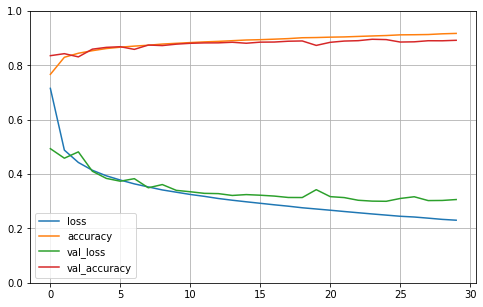

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [7]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 76.9229 - accuracy: 0.8283
[76.9228744506836, 0.8282999992370605]


In [8]:
import numpy as np

X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

y_pred = model.predict_classes(X_new)
print(np.array(class_names)[y_pred])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
['Ankle boot' 'Pullover' 'Trouser']
/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8891 - val_loss: 0.9420
Epoch 2/20
363/363 [==============================] - 0s 982us/step - loss: 0.7850 - val_loss: 0.5830
Epoch 3/20
363/363 [==============================] - 0s 920us/step - loss: 0.4782 - val_loss: 0.5137
Epoch 4/20
363/363 [==============================] - 0s 919us/step - loss: 0.4388 - val_loss: 0.4918
Epoch 5/20
363/363 [==============================] - 0s 955us/step - loss: 0.4244 - val_loss: 0.4700
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4169 - val_loss: 0.4677
Epoch 7/20
363/363 [==============================] - 0s 979us/step - loss: 0.4098 - val_loss: 0.4605
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4025 - val_loss: 0.4541
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3986 - val_loss: 0.4498
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3927 - val_lo

In [11]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.1377 - val_loss: 0.9006
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7157 - val_loss: 0.7038
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6182 - val_loss: 0.6518
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5788 - val_loss: 0.6198
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5536 - val_loss: 0.5968
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5349 - val_loss: 0.5801
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5207 - val_loss: 0.5653
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5087 - val_loss: 0.5537
Epoch 9/20


In [12]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

In [14]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
model.save("my_keras_model.h5")

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.1094 - val_loss: 1.1654
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 1.0772 - val_loss: 0.8544
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7681 - val_loss: 0.7308
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6509 - val_loss: 0.7029
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6225 - val_loss: 0.6724
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5979 - val_loss: 0.6485
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5767 - val_loss: 0.6251
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5572 - val_loss: 0.6050
Epoch 9/10


In [15]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])
model = keras.models.load_model('my_keras_model.h5')

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5128 - val_loss: 0.5565
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5012 - val_loss: 0.5454
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4910 - val_loss: 0.5346
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4827 - val_loss: 0.5252
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4746 - val_loss: 0.5177
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4678 - val_loss: 0.5105
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4618 - val_loss: 0.5046
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4565 - val_loss: 0.5006
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4517 - val_loss: 0.4972
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4484 - val_loss: 0.4942

In [16]:
import os

root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4440 - val_loss: 0.4909
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4407 - val_loss: 0.4870
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4373 - val_loss: 0.4839
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4347 - val_loss: 0.4811
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4320 - val_loss: 0.4800
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4295 - val_loss: 0.4790
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4269 - val_loss: 0.4774
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4242 - val_loss: 0.4803
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4229 - val_loss: 0.4753
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4204 - val_loss: 0.4729

In [17]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006